In [1]:
import tensorflow as tf

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools
import tensorflow_hub as hub

In [3]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [4]:
tf.keras.backend.clear_session()

In [87]:
content_path = tf.keras.utils.get_file('marilyn.jpg', 'https://www.moma.org/learn/moma_learning/_assets/www.moma.org/wp/moma_learning/wp-content/uploads/2012/07/Marilyn-PhotoPortrait-332x395.jpg')
style_path_1 = tf.keras.utils.get_file('spiderverse.jpg','https://m.media-amazon.com/images/M/MV5BMTU4NjYwNzAxN15BMl5BanBnXkFtZTgwMDkyODI4NjM@._V1_SX1777_CR0,0,1777,744_AL_.jpg')
style_path_2 = tf.keras.utils.get_file('matrix.jpg','https://m.media-amazon.com/images/M/MV5BMGM1NTk4YjMtNWNkNi00MzY3LWI3OTUtNTdmZGI3NmU2MGI0XkEyXkFqcGdeQXVyOTY2MDM3MjM@._V1_SX1777_CR0,0,1777,728_AL_.jpg')
style_path_3 = tf.keras.utils.get_file('frozen.jpg','https://m.media-amazon.com/images/M/MV5BYTk2MzNmZDAtODg5NC00OGYwLWE5MGMtNzc2NTM4ODQzYWZiXkEyXkFqcGdeQXVyNjQ4ODE4MzQ@._V1_SX1777_CR0,0,1777,740_AL_.jpg')
style_path_4 = tf.keras.utils.get_file('grandbudapest.jpg','https://m.media-amazon.com/images/M/MV5BN2M0ODJjZTgtYWNhYi00OTc3LWJiZWQtOWRjMWQyMzk3MDRkXkEyXkFqcGdeQXVyMjMzMDI4MjQ@._V1_SY1000_CR0,0,1330,1000_AL_.jpg')

98304/94116 [===============================] - 0s 1us/step


In [88]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [89]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

In [90]:
content_image = load_img(content_path)
style_image_1 = load_img(style_path_1)
style_image_2 = load_img(style_path_2)
style_image_3 = load_img(style_path_3)
style_image_4 = load_img(style_path_4)

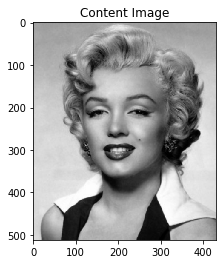

In [91]:
imshow(content_image, 'Content Image')

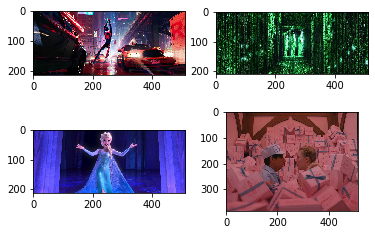

In [92]:
plt.subplot(2, 2, 1)
imshow(style_image_1)

plt.subplot(2, 2, 2)
imshow(style_image_2)

plt.subplot(2, 2, 3)
imshow(style_image_3)

plt.subplot(2, 2, 4)
imshow(style_image_4)

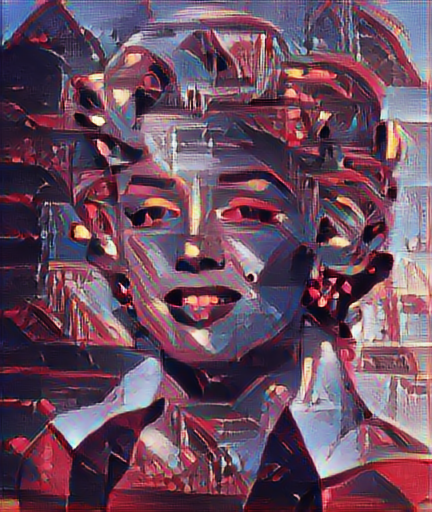

In [93]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image_1 = hub_module(tf.constant(content_image), tf.constant(style_image_1))[0]
tensor_to_image(stylized_image_1)

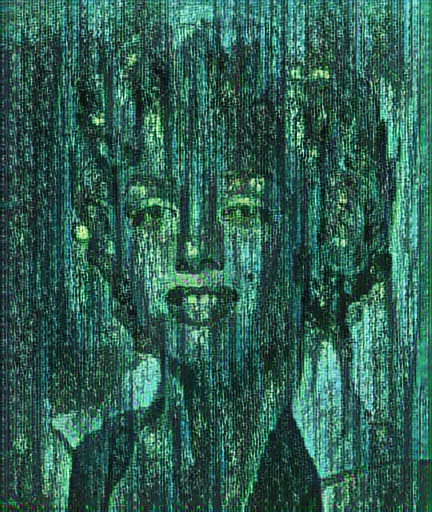

In [94]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image_2 = hub_module(tf.constant(content_image), tf.constant(style_image_2))[0]
tensor_to_image(stylized_image_2)

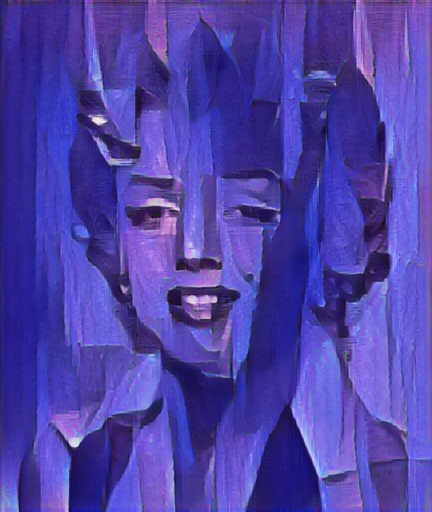

In [95]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image_3 = hub_module(tf.constant(content_image), tf.constant(style_image_3))[0]
tensor_to_image(stylized_image_3)

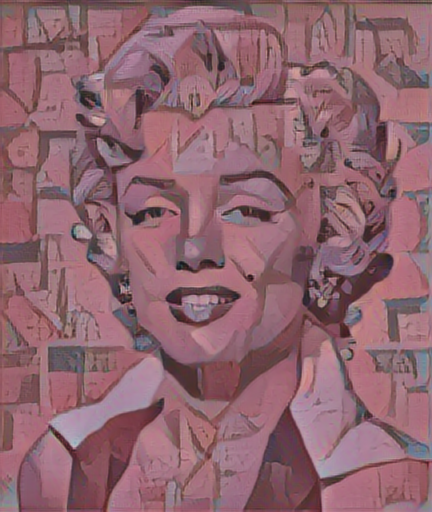

In [96]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image_4 = hub_module(tf.constant(content_image), tf.constant(style_image_4))[0]
tensor_to_image(stylized_image_4)